In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2 #OpenCV library for image pre-processing
from google.colab.patches import cv2_imshow   #for displaying image
import os
import PIL  # Image library in python (PILLOW)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

The flowers dataset contains five sub-directories, one per class:


flowers_photos/
daisy/
dandelion/
roses/
sunflowers/
tulips/

In [2]:
#load flowers dataset from Google website. zip file contains photos of different flower
# flower_photos : directory name where want to store photos of flower from the url mentioned
# cache:directory where u want to save this dataset. I want to save it in my current directory where having this notebook
#untar: means unzip this zip file

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
# read flowers image one by one into numpy array so pathlib is use for easy operations
# It is windows path object
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
# Give me all images having extension .jpg
list(data_dir.glob('*/*/*.jpg'))

[PosixPath('datasets/flower_photos/flower_photos/sunflowers/4977385375_e271e282f9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/253586685_ee5b5f5232.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/2588234269_c4bfd0d8b9_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/15241431045_65201cf15a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/8265023280_713f2c69d0_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/1314584013_fe935fdeb1_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/5738580862_e128192f75.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/4846786944_2832c5c8b8.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/6606806621_5267acdd38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/5492906452_80943bfd04.jpg'),
 PosixPath(

In [6]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))
image_count

3670

In [7]:
# count of no.of roses
roses=list(data_dir.glob('*/roses/*'))
len(roses)

641

In [8]:
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16149016979_23ef42b642_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9404876600_04f6d37685.jpg')]

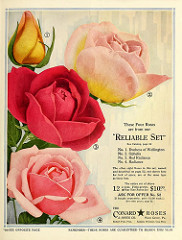

In [9]:
# To display image using PIL
PIL.Image.open(str(roses[2]))

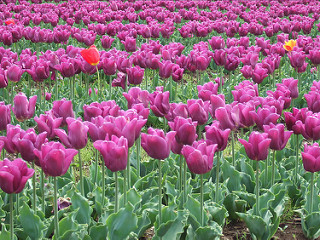

In [10]:
tulips=list(data_dir.glob('*/tulips/*'))
PIL.Image.open(str(tulips[2]))

In [11]:
# List of all flowers images path
flowers_images_dict={
    'roses':list(data_dir.glob('*/roses/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*'))
}

In [12]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16149016979_23ef42b642_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16545641666_2781e542a0_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5332550500_ab341aefd8.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15859434664_67bf3ef29f.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4951581805_b049304f1b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5125780

In [13]:
flowers_images_dict['tulips']

[PosixPath('datasets/flower_photos/flower_photos/tulips/112428919_f0c5ad7d9d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7070694881_e9a331fa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/130685347_afbffe3afa_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/3421027755_cdb8fef8e8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/8520488975_a50d377f91.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/17862445825_f7031d6f26.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/3457017604_90e4de7480_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13999402743_f563f6b685_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/11746548_26b3256922_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/176458518_f81d4bff8e.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13562266594_69b807f90c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tuli

In [14]:
# Assign labels
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'

array([[[ 89, 135, 113],
        [137, 176, 155],
        [144, 176, 159],
        ...,
        [ 26,  76,  52],
        [ 25,  75,  51],
        [ 24,  75,  48]],

       [[ 75, 123,  97],
        [100, 142, 117],
        [136, 169, 148],
        ...,
        [ 29,  79,  55],
        [ 28,  78,  54],
        [ 27,  78,  51]],

       [[ 78, 130, 100],
        [ 90, 135, 108],
        [106, 142, 118],
        ...,
        [ 32,  82,  58],
        [ 31,  82,  55],
        [ 31,  82,  55]],

       ...,

       [[ 19,  76,  43],
        [ 15,  76,  40],
        [ 26,  84,  49],
        ...,
        [ 30,  87,  54],
        [ 30,  87,  54],
        [ 31,  88,  55]],

       [[ 22,  81,  50],
        [ 22,  82,  48],
        [ 32,  90,  55],
        ...,
        [ 29,  87,  52],
        [ 29,  87,  52],
        [ 30,  88,  53]],

       [[ 34,  93,  62],
        [ 32,  92,  58],
        [ 37,  95,  60],
        ...,
        [ 26,  87,  51],
        [ 28,  86,  51],
        [ 29,  87,  52]]], dtype=uint8)
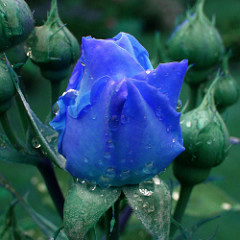

In [16]:
# Read images from disk and convert it into 3-D numpy array
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [17]:
img.shape

(240, 240, 3)

In [18]:
# Dimensions of the images are not same. For training NN require all dimensions of same size
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [19]:
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [20]:
# Prepare X (independent) and y(labels) variable as it is labelled data
X,y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [21]:
y[:5]  # Converted into numbers for labels (roses:0, daisy:1, dandelion:2 ....)

[0, 0, 0, 0, 0]

array([[[ 94, 139, 117],
        [137, 172, 153],
        [138, 168, 152],
        ...,
        [ 27,  76,  54],
        [ 26,  76,  52],
        [ 25,  75,  49]],

       [[ 79, 128, 101],
        [108, 147, 123],
        [125, 157, 137],
        ...,
        [ 31,  80,  57],
        [ 30,  80,  56],
        [ 29,  80,  53]],

       [[ 79, 133, 104],
        [ 89, 132, 108],
        [120, 156, 134],
        ...,
        [ 32,  84,  60],
        [ 31,  84,  58],
        [ 31,  84,  57]],

       ...,

       [[ 20,  78,  43],
        [ 17,  75,  40],
        [ 35,  88,  51],
        ...,
        [ 30,  87,  54],
        [ 30,  87,  54],
        [ 30,  87,  54]],

       [[ 20,  79,  46],
        [ 24,  83,  48],
        [ 43,  96,  59],
        ...,
        [ 28,  88,  53],
        [ 30,  87,  53],
        [ 30,  88,  54]],

       [[ 32,  91,  59],
        [ 33,  92,  58],
        [ 44,  97,  59],
        ...,
        [ 27,  88,  52],
        [ 27,  86,  51],
        [ 29,  87,  52]]], dtype=uint8)
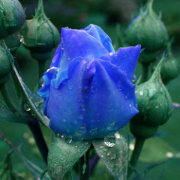

In [22]:
X[0]  # #D array : width, height, RGB channel for colour image

In [23]:
# converting list into numpy array
X=np.array(X)
y=np.array(y)

In [24]:
# Split images into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #default split=25% if not mentioned

In [25]:
len(X_train)

2752

In [26]:
len(X_test)

918

In [27]:
# Scale it into 0 to 1
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [72]:
num_classes=5
# Build CNN model
model=Sequential([

    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(num_classes)  # 5 types of flowers by default linear activation function


   ])

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4124 - loss: 1.3611
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6455 - loss: 0.9221
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7443 - loss: 0.6957
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8222 - loss: 0.4882
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8983 - loss: 0.2956
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9608 - loss: 0.1444
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9758 - loss: 0.0941
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9818 - loss: 0.0639
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9924 - loss: 0.0296
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9932 - loss: 0.0359


In [75]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6615 - loss: 1.7114


[1.7410359382629395, 0.6644880175590515]

Result is : Overfitting
Training accuracy = 99%

Testing accuracy = 66%

In [33]:
# predict
predictions=model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[  6.176367  ,  13.916517  ,  -5.5734468 , -24.106802  ,
         10.532845  ],
       [ 14.57232   ,  -6.874926  , -12.656347  ,  -2.6454616 ,
          9.887583  ],
       [  0.6759008 ,  -1.4212781 ,  11.855605  , -13.041923  ,
         -4.330906  ],
       ...,
       [  4.7223763 ,  -1.8279995 , -10.626146  ,  -1.2934496 ,
          7.625687  ],
       [  0.26052955, -11.024829  ,   1.7698351 ,   4.3710265 ,
         -0.4204283 ],
       [ -4.737681  ,  -0.62276316,   1.4335252 ,   3.488747  ,
          0.44715616]], dtype=float32)

In [34]:
# Linear activation function gives values all over places
# convert it into probablity score values by using softmax function
# convert numpy array into set of probabilities [0 to 1]
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.2055675e-04, 9.6678358e-01, 3.3185292e-09, 2.9649101e-17,
       3.2795850e-02], dtype=float32)>

In [38]:
int(np.argmax(np.array([0,78,165,42])))

2

In [40]:
int(np.argmax(score))   #1=>daisy flower

1

In [42]:
int(y_test[0])  # 1: daisy flower, so predicted correctly

1

**Addressing overfitting problem**

In [52]:
# Use data Augmentation
data_augmentation=keras.Sequential([
   layers.RandomZoom(0.9),
])

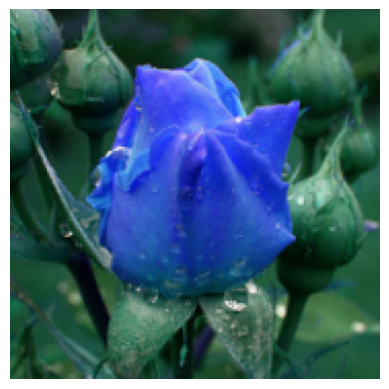

In [46]:
plt.axis('off')
plt.imshow(X[0])

In [54]:
data_augmentation(X)[0] # gives tensor array (transformed image)

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 89.99992 , 113.98254 ,  96.      ],
        [ 86.6236  , 108.40802 ,  90.51228 ],
        [ 81.53036 , 106.05093 ,  81.31865 ],
        ...,
        [ 66.043335, 123.54033 ,  94.03233 ],
        [ 64.31871 , 123.30116 ,  92.30116 ],
        [ 65.0441  , 123.04402 ,  92.04402 ]],

       [[ 94.46785 , 119.84309 , 102.22263 ],
        [ 87.77528 , 113.89721 ,  94.77528 ],
        [ 82.918945, 111.98281 ,  86.71725 ],
        ...,
        [ 74.25557 , 130.22803 , 101.00157 ],
        [ 74.602104, 131.6021  , 100.602104],
        [ 73.03883 , 130.03883 ,  99.03883 ]],

       [[ 96.966995, 122.9954  , 107.43938 ],
        [ 92.009995, 122.28434 ,  99.22767 ],
        [ 85.88695 , 117.32636 ,  88.789856],
        ...,
        [ 83.27059 , 136.55249 , 108.34702 ],
        [ 81.978004, 138.97801 , 107.978004],
        [ 83.95065 , 139.47173 , 107.73227 ]],

       ...,

       [[ 49.38686 ,  92.17935 ,  60.957687],
        [ 33.

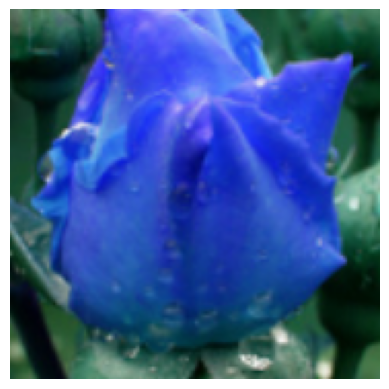

In [55]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  # Showing zoomed output


In [58]:
# Other type of transofrmation is randomcontrast
data_augmentation=keras.Sequential([
   layers.RandomContrast(0.9),
])


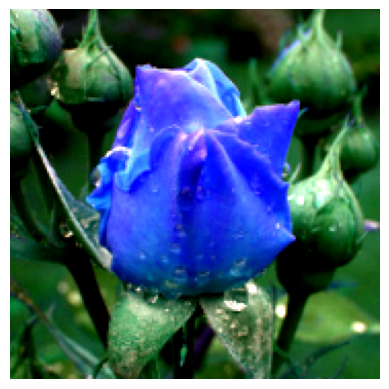

In [59]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  # Showing bright output

In [60]:
data_augmentation=keras.Sequential([
   layers.RandomRotation(0.9),
])

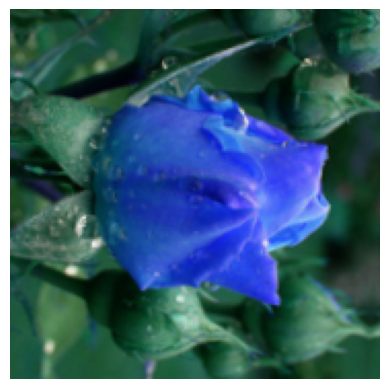

In [61]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  # Showing rotated output

To reduce overfitting problem, use data augmentation.
create more samples by applying different transformation like rotation, scaling, contrast, zoom

In [63]:
img_height = 180
img_width = 180

data_augmentation=keras.Sequential([
   layers.RandomFlip("horizontal",input_shape=(img_height, img_width,3)),
   layers.RandomZoom(0.1),
   layers.RandomRotation(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
num_classes=5
# Build CNN model
model=Sequential([
    layers.Input(shape=(img_height, img_width, 3)), # Add Input layer
    data_augmentation, # Add data augmentation layer
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # Add Dropout layer (drop 20% of neuron at random ineach pass for better generalization)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  # 5 types of flowers by default linear activation function

])

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9131 - loss: 0.2591
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9144 - loss: 0.2212
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9118 - loss: 0.2229
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9076 - loss: 0.2623
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9210 - loss: 0.2219
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9263 - loss: 0.1956
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9333 - loss: 0.1905
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9335 - loss: 0.1979
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9422 - loss: 0.1946
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9331 - loss: 0.1923
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9447 - loss: 0.1566
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy:

Training Accuracy of new model(Data Augmentation)= 96%

Testing accuracy= 74%

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7397 - loss: 1.2033


[1.1843458414077759, 0.7407407164573669]